In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data_path = '/opt/ml/input/data/'
test = pd.read_csv(data_path + 'test_data.csv')
train = pd.read_csv(data_path + 'train_data.csv')

train = train.merge(test, how='outer')

In [7]:
tmp = train.columns
tmp1 = [*map(str.lower, tmp)]
train.columns = tmp1
train

,userid,assessmentitemid,testid,answercode,timestamp,knowledgetag
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225
...,...,...,...,...,...,...
2526695,7439,A040130001,A040000130,0,2020-10-14 23:07:23,8832
2526696,7439,A040130002,A040000130,1,2020-10-14 23:07:41,8832
2526697,7439,A040130003,A040000130,1,2020-10-14 23:08:02,8244
2526698,7439,A040130004,A040000130,1,2020-10-14 23:09:31,8244


In [9]:
train['probnum'] = train['assessmentitemid'].apply(lambda x: int(x[-3:]))
#각 시험 속 문항 번호

2       1
3       6
4      46
5     620
6     290
7     276
8     218
9      58
10      8
11      3
12     10
13      1
Name: probnum, dtype: int64


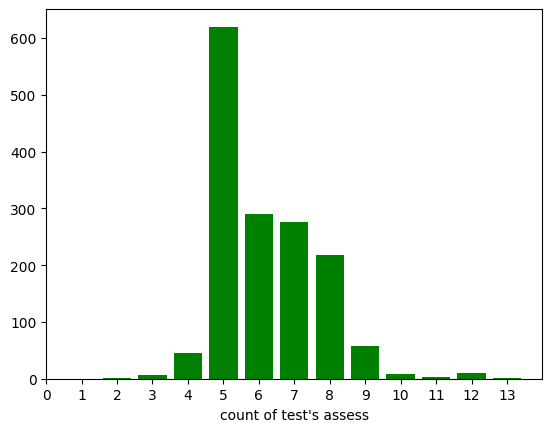

In [42]:
tmp = train.groupby('testid')
tmp = tmp['probnum'].max().value_counts().sort_index()
print(tmp)
tmp = tmp.to_dict()
#각 시험별 문항 수.(모든 시험에 대해 어떤 학생은 최소한 해당 시험을 끝까지 풀었을 것이라 가정)
fig, ax = plt.subplots()
ax.bar(tmp.keys(), tmp.values(), color='g')
ax.set_xticks(np.arange(14))
ax.set_xlabel("count of test's assess")
plt.show()

In [85]:
tmp = train.groupby('testid')
tmp = tmp['probnum'].max()
# print(type(tmp))
train['maxass'] = train['testid'].map(tmp)
train

<class 'pandas.core.series.Series'>


,userid,assessmentitemid,testid,answercode,timestamp,knowledgetag,probnum,maxass
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,1,7
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,2,7
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,3,7
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,4,7
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,5,7
...,...,...,...,...,...,...,...,...
2526695,7439,A040130001,A040000130,0,2020-10-14 23:07:23,8832,1,5
2526696,7439,A040130002,A040000130,1,2020-10-14 23:07:41,8832,2,5
2526697,7439,A040130003,A040000130,1,2020-10-14 23:08:02,8244,3,5
2526698,7439,A040130004,A040000130,1,2020-10-14 23:09:31,8244,4,5


In [88]:
train[(train['probnum'] > train['maxass'])]

,userid,assessmentitemid,testid,answercode,timestamp,knowledgetag,probnum,maxass


In [89]:
all_solved = train[(train['probnum'] == train['maxass'])]
# 최종 문항을 푼 케이스
chall_solve = train[(train['probnum'] == 1)]
# 1번 문항을 푼 케이스(== 해당 시험을 시도한 케이스)
all_solved.count() / chall_solve.count()

userid              1.002293
assessmentitemid    1.002293
testid              1.002293
answercode          1.002293
timestamp           1.002293
knowledgetag        1.002293
probnum             1.002293
maxass              1.002293
dtype: float64

최종 문항을 푼 횟수가, 1번 문항을 푼 케이스보다 많이 나오고 있다. \
가정 1. 난이도가 어려운 최종 문항을 여러번 풀었다.  
가정 2. 문항의 순서와 난이도는 관련이 없고, 무작위 순서로 문제가 출제되었다.  
가정 3. 수업용으로 시험을 활용하고 있다.

In [70]:
all_solved[all_solved.duplicated(('userid', 'assessmentitemid'))]

,userid,assessmentitemid,testid,answercode,timestamp,knowledgetag,probnum,maxass
1402,1,A040155006,A040000155,1,2020-08-17 10:02:07,2111,6,6
1408,1,A040156006,A040000156,1,2020-08-17 11:04:37,2112,6,6
1414,1,A040157006,A040000157,1,2020-08-18 03:00:48,2113,6,6
1424,1,A040158006,A040000158,1,2020-08-19 03:32:37,2114,6,6
1443,1,A040160005,A040000160,1,2020-08-21 12:43:35,11236,5,5
...,...,...,...,...,...,...,...,...
2521419,6027,A030131005,A030000131,-1,2020-10-13 22:54:46,7789,5,5
2521912,6074,A050172007,A050000172,1,2020-10-21 09:53:03,10395,7,7
2522049,6081,A030108006,A030000108,1,2020-09-04 08:59:20,554,6,6
2524176,6594,A030153005,A030000153,0,2020-10-22 07:23:14,1720,5,5


In [71]:
train[(train['userid'] == 1)  & (train['assessmentitemid'] == 'A040155006')]

,userid,assessmentitemid,testid,answercode,timestamp,knowledgetag,probnum,maxass
1171,1,A040155006,A040000155,0,2020-06-21 23:01:44,2111,6,6
1402,1,A040155006,A040000155,1,2020-08-17 10:02:07,2111,6,6


In [73]:
#처음 도전으로 성공 못한 놈들만 보자. 
solve = train.copy()
solve = solve.drop_duplicates(('userid', 'assessmentitemid'))

In [81]:
p1 = solve[(solve['probnum'] == solve['maxass'])]
p2 = solve[(solve['probnum'] == 1)]
p1.count()/p2.count()

userid              1.002321
assessmentitemid    1.002321
testid              1.002321
answercode          1.002321
timestamp           1.002321
knowledgetag        1.002321
probnum             1.002321
maxass              1.002321
dtype: float64

2484817